<a href="https://www.kaggle.com/code/aicortex/a-step-by-step-guide-with-knn-pipeline?scriptVersionId=213553646" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color: #f4f4f4; border: 2px solid #4CAF50; border-radius: 10px; padding: 20px; text-align: center; font-family: Arial, sans-serif;">
    <h2 style="color: #4CAF50; font-size: 36px; margin-bottom: 10px;">Adult Income Analysis</h1>
    <h2 style="color: #333; font-size: 24px; margin-bottom: 20px;">A Step-by-Step Guide with KNN</h2>
    <p style="color: #555; font-size: 18px; line-height: 1.6;">
        🚀 Welcome to this exciting journey! In this notebook, we'll explore the 
        <b>Adult Income Dataset</b>, tackle a classic classification problem, 
        and build an end-to-end pipeline with the power of 
        <span style="color: #4CAF50; font-weight: bold;">K-Nearest Neighbors (KNN)</span>. 
    </p>
    <p style="color: #555; font-size: 18px; line-height: 1.6;">
        Whether you're new to data science or an experienced pro, this guide will help you 
        understand the nuances of KNN and pipeline creation with ease. 
    </p>
    <div style="margin-top: 20px;">
        <a href="#import-libraries" style="text-decoration: none; color: white; background-color: #4CAF50; padding: 10px 20px; border-radius: 5px; font-size: 18px;">Get Started!</a>
    </div>
</div> </div>
</div>


<div id="import-libraries" style="background-color: #282c34; color: white; border-radius: 10px; padding: 20px; margin: 20px 0; font-family: Arial, sans-serif; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #61dafb; font-size: 28px; margin-bottom: 10px;">📚 Import Libraries</h2>
    <p style="font-size: 18px; line-height: 1.6; color: #dcdcdc;">
        Before diving into data analysis and building models, we need to import the necessary libraries. 
        These libraries provide essential tools for data manipulation, visualization, and machine learning.  
    </p>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import (classification_report, make_scorer, 
accuracy_score, f1_score, precision_score, ConfusionMatrixDisplay)

from imblearn.over_sampling import SMOTE
from joblib import Memory

<div style="background-color: #282c34; color: white; border-radius: 10px; padding: 20px; margin: 20px 0; font-family: Arial, sans-serif; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #61dafb; font-size: 28px; margin-bottom: 10px;">📂 Load Data</h2>
</div>


In [3]:
df = pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<div style="background-color: #282c34; color: white; border-radius: 10px; padding: 20px; margin: 20px 0; font-family: Arial, sans-serif; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #61dafb; font-size: 28px; margin-bottom: 10px;">🔍 Exploring Unique Values in Categorical Columns</h2>
    <p style="font-size: 18px; line-height: 1.6; color: #dcdcdc;">
        Below are the unique values for each categorical column in the dataset:
    </p>
    </div>
</div>

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} : \n{df[col].unique()}")
        print("\n-------------------------------------------------------------------\n")

workclass : 
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

-------------------------------------------------------------------

education : 
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

-------------------------------------------------------------------

marital-status : 
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

-------------------------------------------------------------------

occupation : 
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

-------------------------------------------------------------------

relationship : 

<div style="background-color: #282c34; color: white; border-radius: 10px; padding: 20px; margin: 20px 0; font-family: Arial, sans-serif; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #61dafb; font-size: 28px; margin-bottom: 10px;">🔄 Data Splitting and Label Encoding</h2>
    <p style="font-size: 18px; line-height: 1.6; color: #dcdcdc;">
        In this section, the target column (<code>income</code>) is encoded using <b>LabelEncoder</b>, 
        and the dataset is split into training and testing sets with stratified sampling.
    </pe>
    </div>
</div>


In [6]:
lb = LabelEncoder()

X = df.drop('income', axis=1)
y = lb.fit_transform(df['income'])
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42,
                                                    stratify=y)


<div style="background-color: #282c34; color: white; border-radius: 10px; padding: 20px; margin: 20px 0; font-family: Arial, sans-serif; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #61dafb; font-size: 28px; margin-bottom: 10px;">⚙️ Creating a Preprocessing and Modeling Pipeline</h2>
    <p style="font-size: 18px; line-height: 1.6; color: #dcdcdc;">
        In this section, we define a preprocessing pipeline using <b>ColumnTransformer</b> and integrate it with the <b>KNeighborsClassifier</b>. 
        The pipeline handles numerical scaling, one-hot encoding for unordered categorical features, and ordinal encoding for ordered categories.
    </p>
</div>


In [7]:
memory = Memory(location="I_love_kaggle_1", verbose=0)

unorder_col = ['workclass', 'marital-status', 
               'occupation', 'relationship', 'race', 
               'gender', 'native-country']

order_col = ['education']
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', 
                   '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 
                   'Assoc-acdm', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']

unorder_categories = [
    ['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov', 
     'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],  # workclass
    ['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced', 
     'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],  # marital-status
    ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
     'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
     'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
     'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],  # occupation
    ['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife', 
     'Other-relative'],  # relationship
    ['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'],  # race
    ['Male', 'Female'],  # gender
    ['United-States', '?', 'Peru', 'Guatemala', 'Mexico', 'Dominican-Republic',
     'Ireland', 'Germany', 'Philippines', 'Thailand', 'Haiti', 'El-Salvador',
     'Puerto-Rico', 'Vietnam', 'South', 'Columbia', 'Japan', 'India', 'Cambodia',
     'Poland', 'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
     'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica', 'Ecuador',
     'Yugoslavia', 'Hungary', 'Hong', 'Greece', 'Trinadad&Tobago',
     'Outlying-US(Guam-USVI-etc)', 'France', 'Holand-Netherlands']  # native-country
]


ct = ColumnTransformer(transformers=[
    ('num', StandardScaler(), make_column_selector(dtype_include='number')),
    ('cat_un_order', OneHotEncoder(drop='first',categories=unorder_categories), unorder_col),
    ('cat_order', OrdinalEncoder(categories=[education_order]), order_col),
])

pip_1 = Pipeline(steps=[
    ('preprocessing', ct),
    ('model', KNeighborsClassifier())],
                 memory = memory,
                 verbose=True)
pip_1

Pipeline(memory=Memory(location=I_love_kaggle_1/joblib),
         steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f83e62001f0>),
                                                 ('cat_un_order',
                                                  OneHotEncoder(categories=[['Private',
                                                                             'Local-gov',
                                                                             '?',
                                                                             'Self-emp-not-inc',
                                                                             'Federal-gov',
                                                                             'State-gov',
                                                                             'Self-emp-inc',
                                                                             'Wi...
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country']),
                                                 ('cat_order',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              '1st-4th',
                                                                              '5th-6th',
                                                                              '7th-8th',
                                                                              '9th',
                                                                              '10th',
                                                                              '11th',
                                                                              '12th',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc-voc',
                                                                              'Assoc-acdm',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Doctorate',
                                                                              'Prof-school']]),
                                                  ['education'])])),
                ('model', KNeighborsClassifier())],
         verbose=True)

<div style="background-color: #282c34; color: white; border-radius: 10px; padding: 20px; margin: 20px 0; font-family: Arial, sans-serif; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #61dafb; font-size: 28px; margin-bottom: 10px;">🧪 Hyperparameter Tuning with GridSearchCV</h2>
    <p style="font-size: 18px; line-height: 1.6; color: #dcdcdc;">
        The following section performs hyperparameter tuning using <b>GridSearchCV</b> for the <b>KNeighborsClassifier</b>. 
        The grid search explores a range of neighbors and evaluates multiple scoring metrics, with <code>accuracy</code> as the refit metric.
   rain);
        </code>
    </div>
</div>


In [8]:
%%time
param_grid = {
    'model__n_neighbors' : np.arange(2, 15),
}

scoring = {
    'accuracy': make_scorer(accuracy_score),  
    'f1': make_scorer(f1_score),              
    'precision': make_scorer(precision_score)
}

clf = GridSearchCV(pip_1, 
                   param_grid, 
                   n_jobs=-1, 
                   cv= StratifiedKFold(2), 
                   verbose=2,
                   scoring=scoring,
                   refit='accuracy')

clf.fit(X_train, y_train);

Fitting 2 folds for each of 13 candidates, totalling 26 fits
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
CPU times: user 2.6 s, sys: 680 ms, total: 3.28 s
Wall time: 11min 51s


<div style="background-color: #282c34; color: white; border-radius: 10px; padding: 20px; margin: 20px 0; font-family: Arial, sans-serif; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #61dafb; font-size: 28px; margin-bottom: 10px;">📊 Visualizing GridSearchCV Results</h2>
    <p style="font-size: 18px; line-height: 1.6; color: #dcdcdc;">
        After completing the hyperparameter tuning, the results can be visualized to better understand the model's performance across different metrics.
        Below, we plot the <b>accuracy</b>, <b>F1-score</b>, and <b>precision</b> for different values of <code>n_neighbors</code>.
           </code>
    </div>
</div>


In [9]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9289
           1       0.73      0.57      0.64      2922

    accuracy                           0.85     12211
   macro avg       0.80      0.75      0.77     12211
weighted avg       0.84      0.85      0.84     12211



In [10]:
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)

Best Parameters: {'model__n_neighbors': 14}
Best Score: 0.8408451618049784


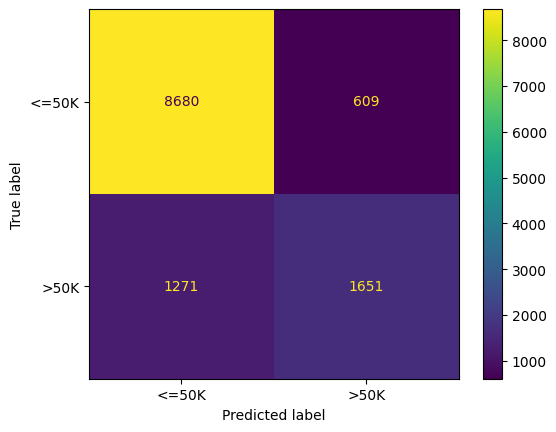

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=lb.classes_)
plt.show()

In [13]:
results = pd.DataFrame(clf.cv_results_)

results = results[['param_model__n_neighbors', 'mean_test_accuracy', 'mean_test_f1', 'mean_test_precision']]
results.sort_values(by='mean_test_accuracy', ascending=False).reset_index(drop=True)

,param_model__n_neighbors,mean_test_accuracy,mean_test_f1,mean_test_precision
0,14,0.840845,0.627173,0.713515
1,10,0.839781,0.620484,0.716131
2,13,0.839699,0.640757,0.690797
3,12,0.839644,0.622688,0.712385
4,9,0.839262,0.642181,0.687021
5,11,0.838661,0.640153,0.686377
6,8,0.838661,0.614265,0.717679
7,7,0.836750,0.636603,0.681055
8,6,0.835576,0.601304,0.716171
9,5,0.833229,0.631961,0.669518


<div style="background-color: #fff3cd; color: #856404; border: 2px solid #ffeeba; border-radius: 10px; padding: 20px; margin: 20px 0; font-family: Arial, sans-serif; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h2 style="font-size: 24px; margin-bottom: 15px;">🙌 If You Found This Notebook Helpful, Please Upvote!</h2>
    <p style="font-size: 18px; line-height: 1.6; color: #856404;">
        Your support motivates me to create more detailed and insightful content.  
        If this notebook added value to your learning journey, an <b>upvote</b> would mean a lot! 🚀✨
    </p>
    <p style="font-size: 18px; line-height: 1.6; color: #856404;">Thank you for your time and support! 💖</p>
</div>
